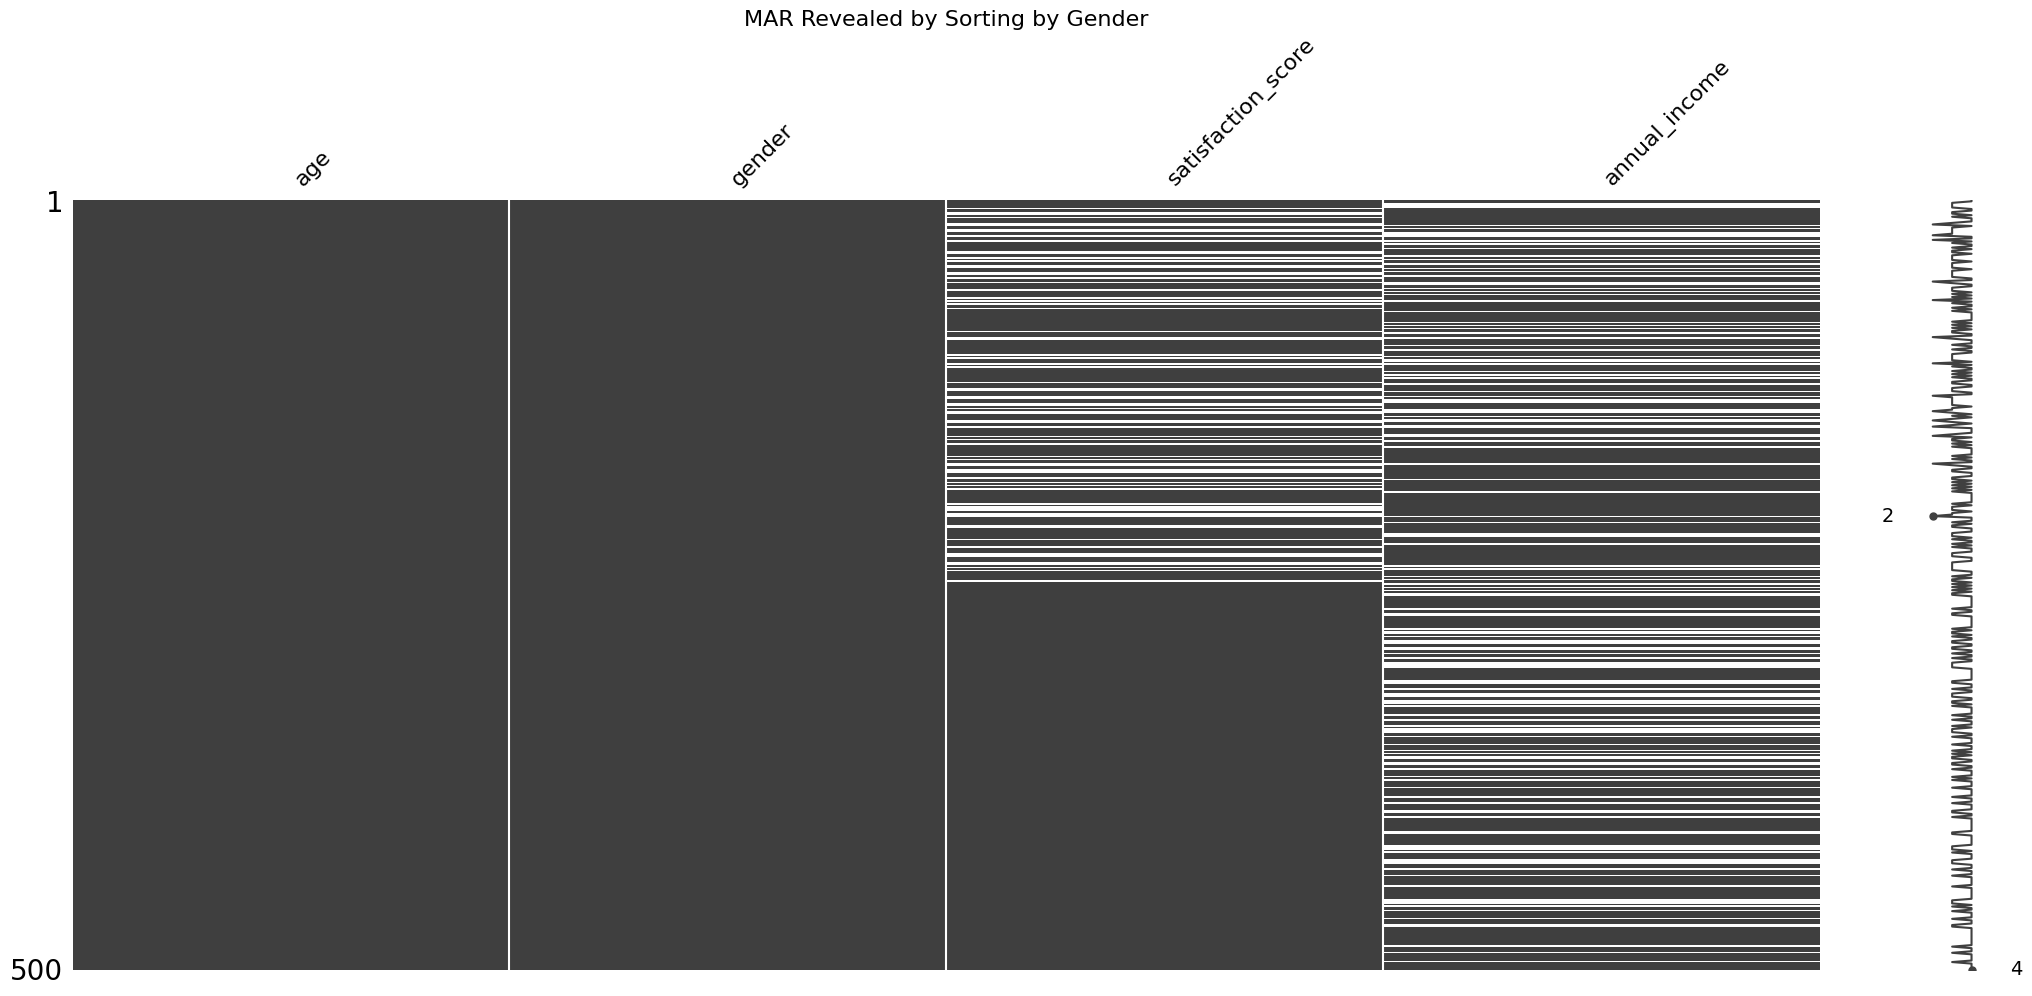

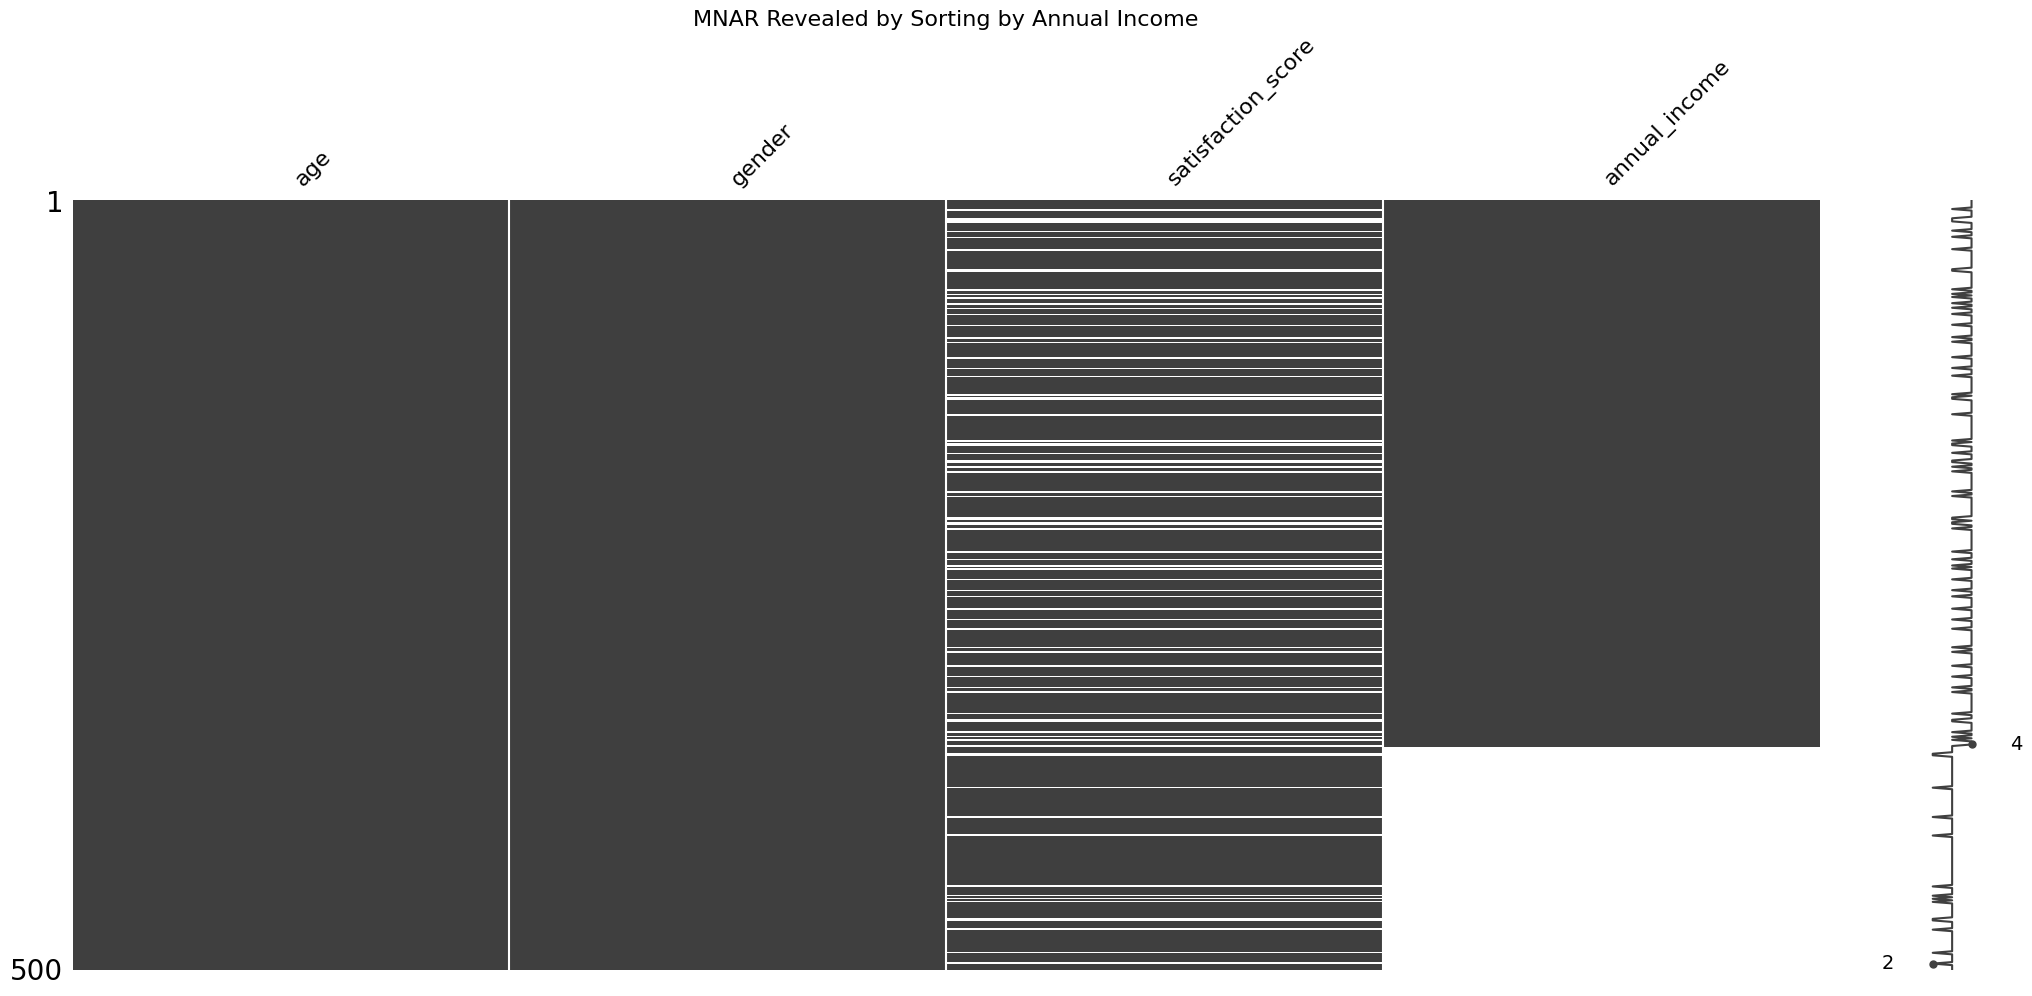

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

# --- Same dummy data generation as before ---
np.random.seed(42)
data_size = 500
data = {
    'age': np.random.randint(18, 65, size=data_size),
    'gender': np.random.choice(['Male', 'Female'], size=data_size, p=[0.5, 0.5]),
    'satisfaction_score': np.random.randint(1, 6, size=data_size).astype(float),
    'annual_income': np.random.randint(25000, 150000, size=data_size).astype(float)
}
df = pd.DataFrame(data)

# Introduce MAR in 'satisfaction_score' related to 'gender'b
for i, gender in df['gender'].items():
    if gender == 'Female':
        if np.random.rand() < 0.3:
            df.loc[i, 'satisfaction_score'] = np.nan

# Introduce MNAR in 'annual_income' related to itself
for i, income in df['annual_income'].items():
    if income > 100000:
        if np.random.rand() < 0.7:
            df.loc[i, 'annual_income'] = np.nan

# --- Visualization 1: Revealing MAR ---
# Sorting by 'gender' shows the pattern in 'satisfaction_score'
msno.matrix(df.sort_values('gender'))
plt.title('MAR Revealed by Sorting by Gender', fontsize=16)
plt.show()

# --- Visualization 2: Revealing MNAR ---
# Sorting by 'annual_income' shows the pattern in itself
msno.matrix(df.sort_values('annual_income'))
plt.title('MNAR Revealed by Sorting by Annual Income', fontsize=16)
plt.show()

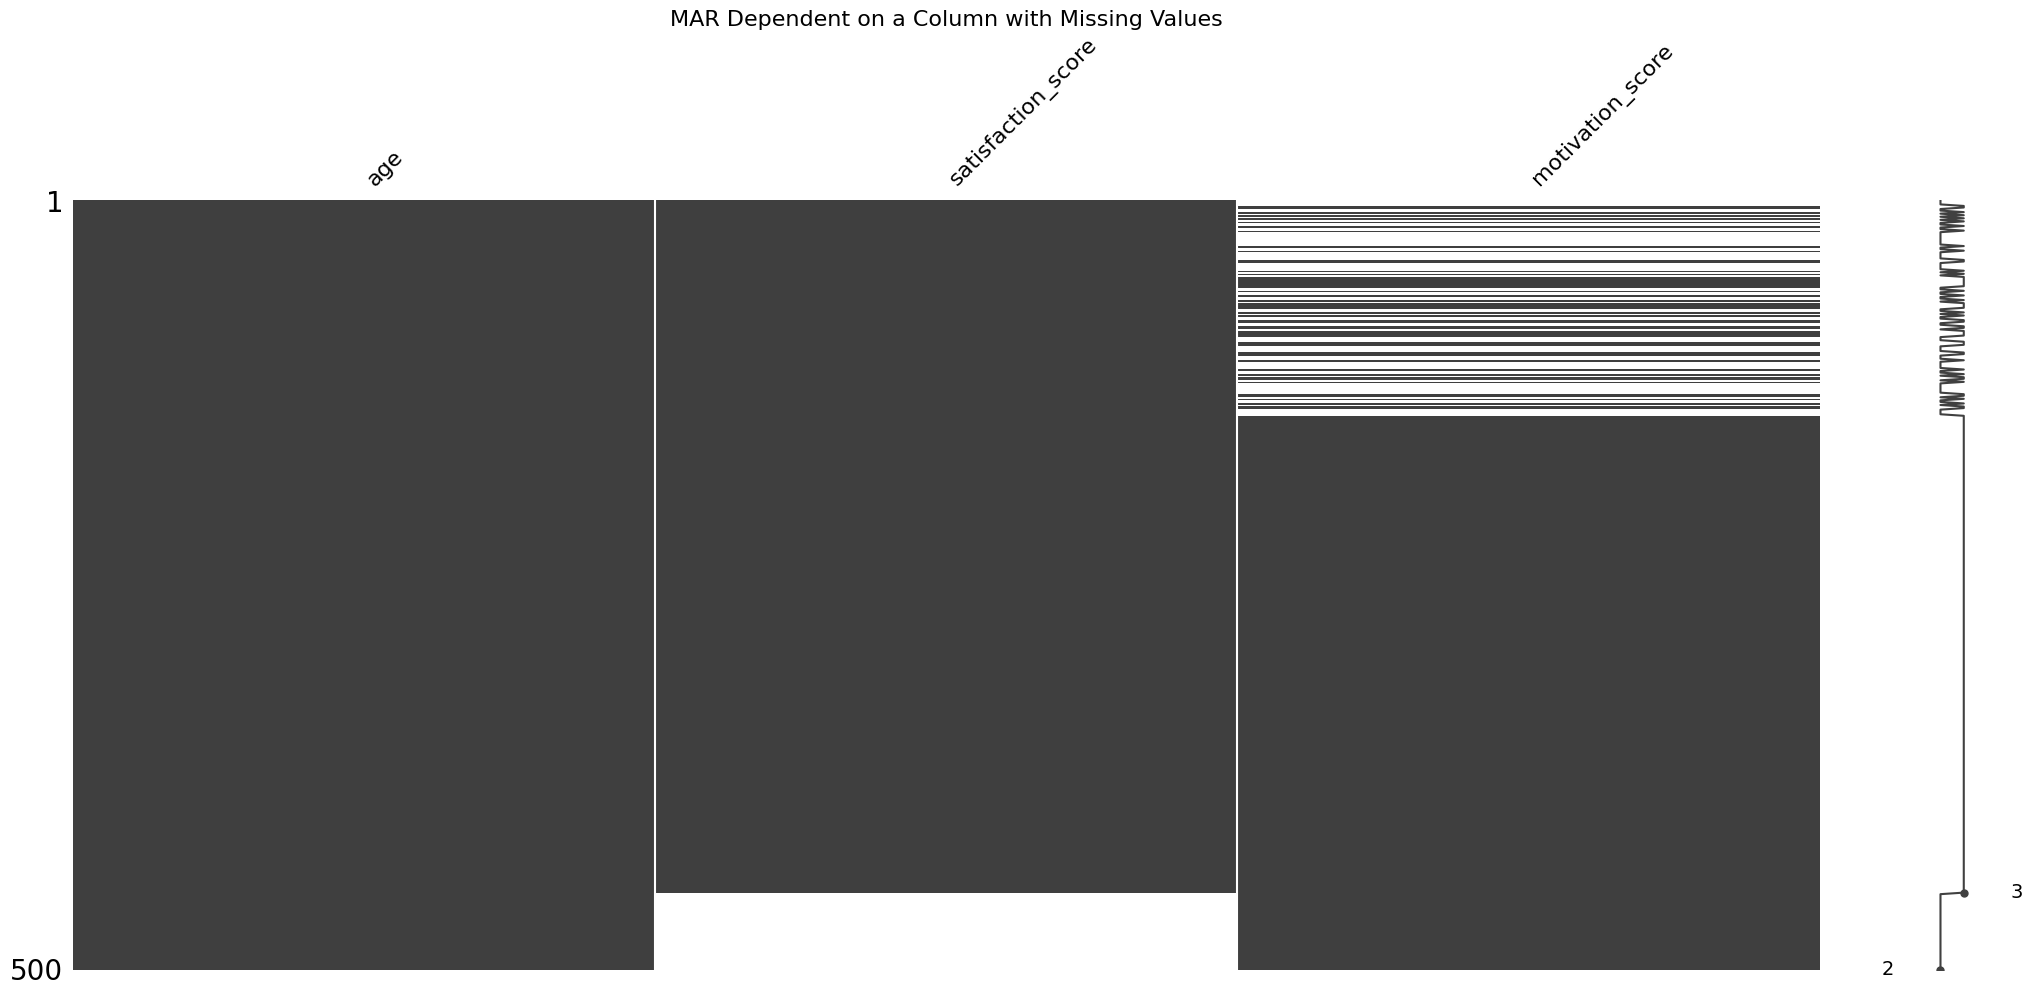

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

# 1. Create the base data
np.random.seed(0) # for reproducible results
data_size = 500
data = {
    'age': np.random.randint(22, 60, size=data_size),
    'satisfaction_score': np.random.randint(1, 11, size=data_size).astype(float),
    'motivation_score': np.random.randint(1, 11, size=data_size).astype(float),
}
df = pd.DataFrame(data)

# 2. Introduce MCAR into the "predictor" column
# Randomly delete 10% of satisfaction scores (the glitch)
mcar_indices = df.sample(frac=0.10).index
df.loc[mcar_indices, 'satisfaction_score'] = np.nan

# 3. Introduce MAR that depends on the (now incomplete) predictor column
# Missingness in 'motivation_score' depends on 'satisfaction_score'
for i, satisfaction in df['satisfaction_score'].items():
    # Check if satisfaction is not one of the missing values
    if pd.notna(satisfaction):
        # If satisfaction is low (e.g., less than 4), there's a 60% chance motivation is missing
        if satisfaction < 4:
            if np.random.rand() < 0.6:
                df.loc[i, 'motivation_score'] = np.nan

# 4. Visualize with missingno
# Sorting by 'satisfaction_score' will show the relationship
msno.matrix(df.sort_values('satisfaction_score'))
plt.title('MAR Dependent on a Column with Missing Values', fontsize=16)
plt.show()

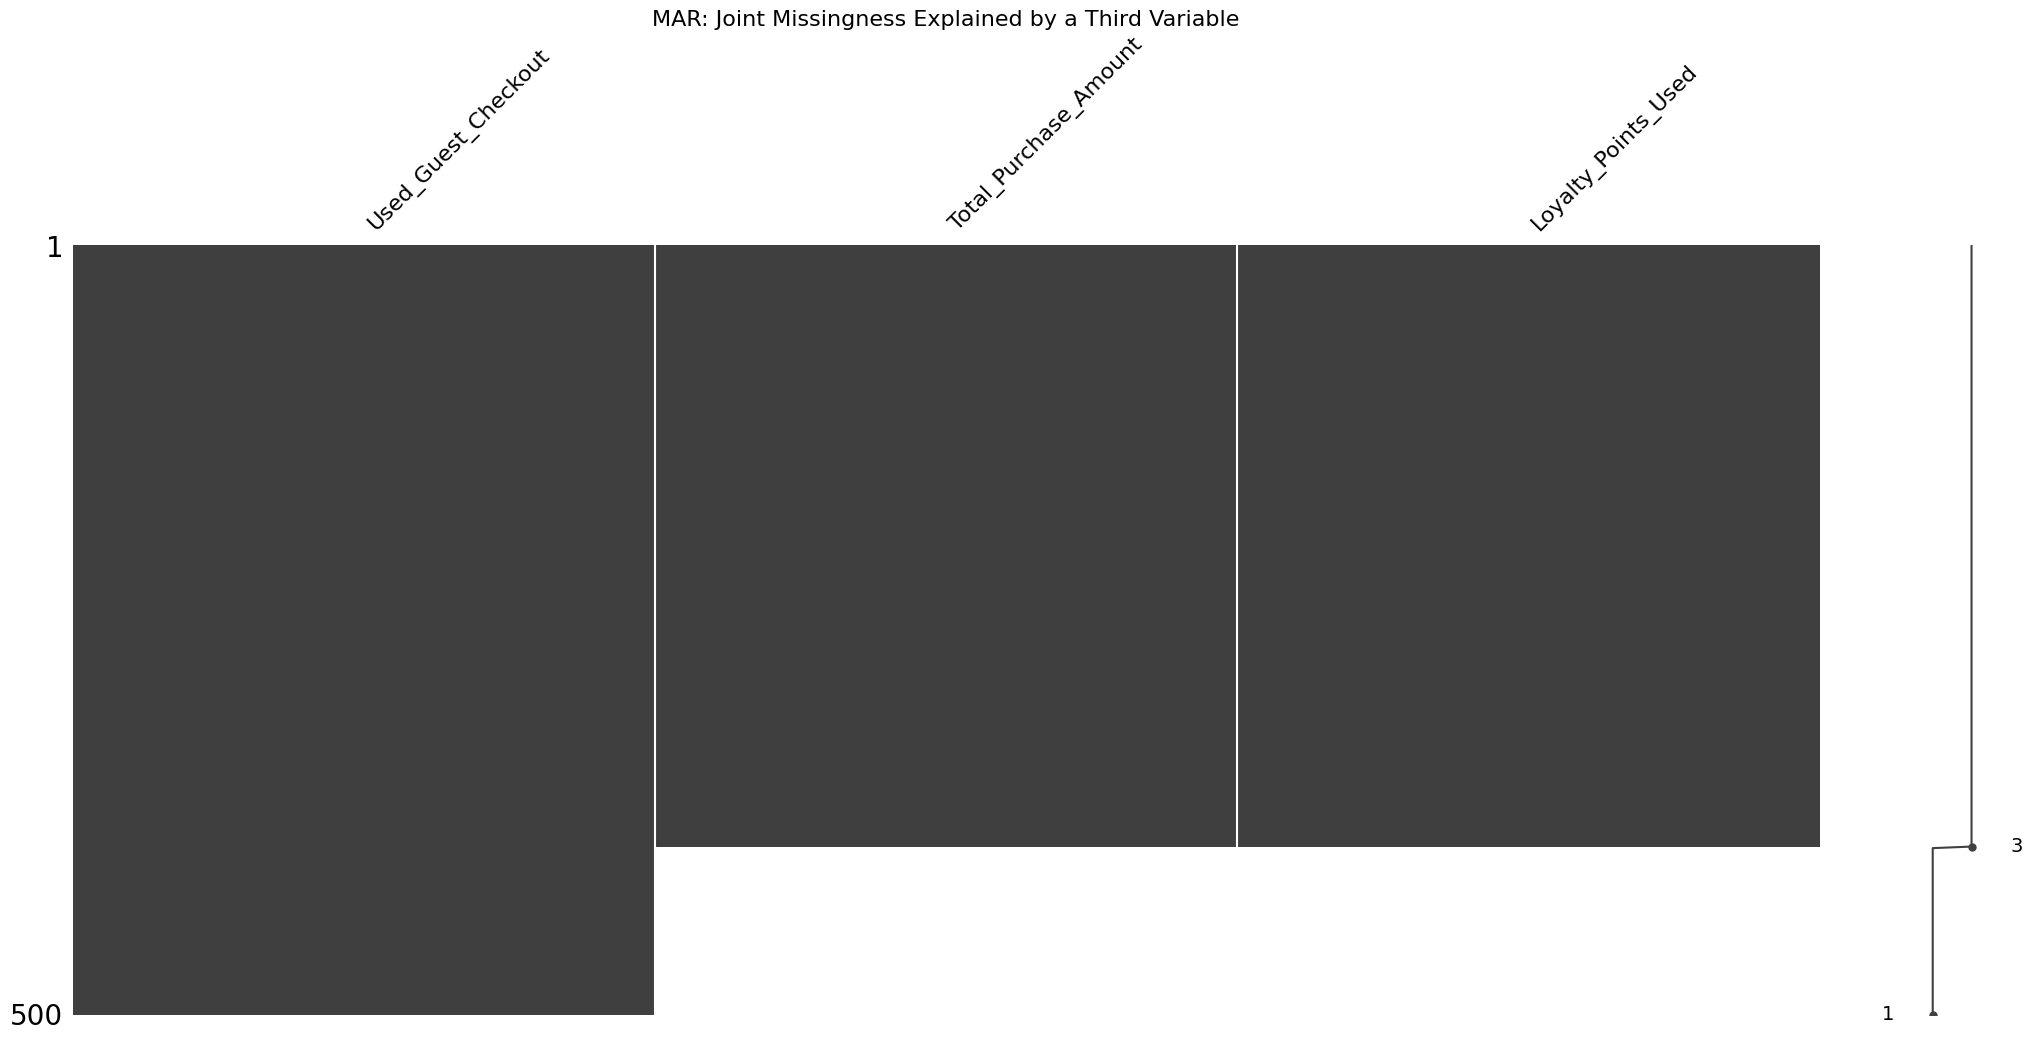

In [3]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

# 1. Create the base data
np.random.seed(10) # for reproducible results
data_size = 500
data = {
    'Used_Guest_Checkout': np.random.choice([True, False], size=data_size, p=[0.2, 0.8]),
    'Total_Purchase_Amount': np.random.uniform(10, 500, size=data_size),
    'Loyalty_Points_Used': np.random.randint(0, 100, size=data_size).astype(float),
}
df = pd.DataFrame(data)

# 2. Introduce MAR based on the 'Used_Guest_Checkout' column
# Find where Used_Guest_Checkout is True
guest_indices = df[df['Used_Guest_Checkout'] == True].index

# Set the other two columns to NaN for those indices
df.loc[guest_indices, ['Total_Purchase_Amount', 'Loyalty_Points_Used']] = np.nan

# 3. Visualize with missingno
# Sorting by 'Used_Guest_Checkout' reveals the MAR pattern
msno.matrix(df.sort_values('Used_Guest_Checkout'))
plt.title('MAR: Joint Missingness Explained by a Third Variable', fontsize=16)
plt.show()


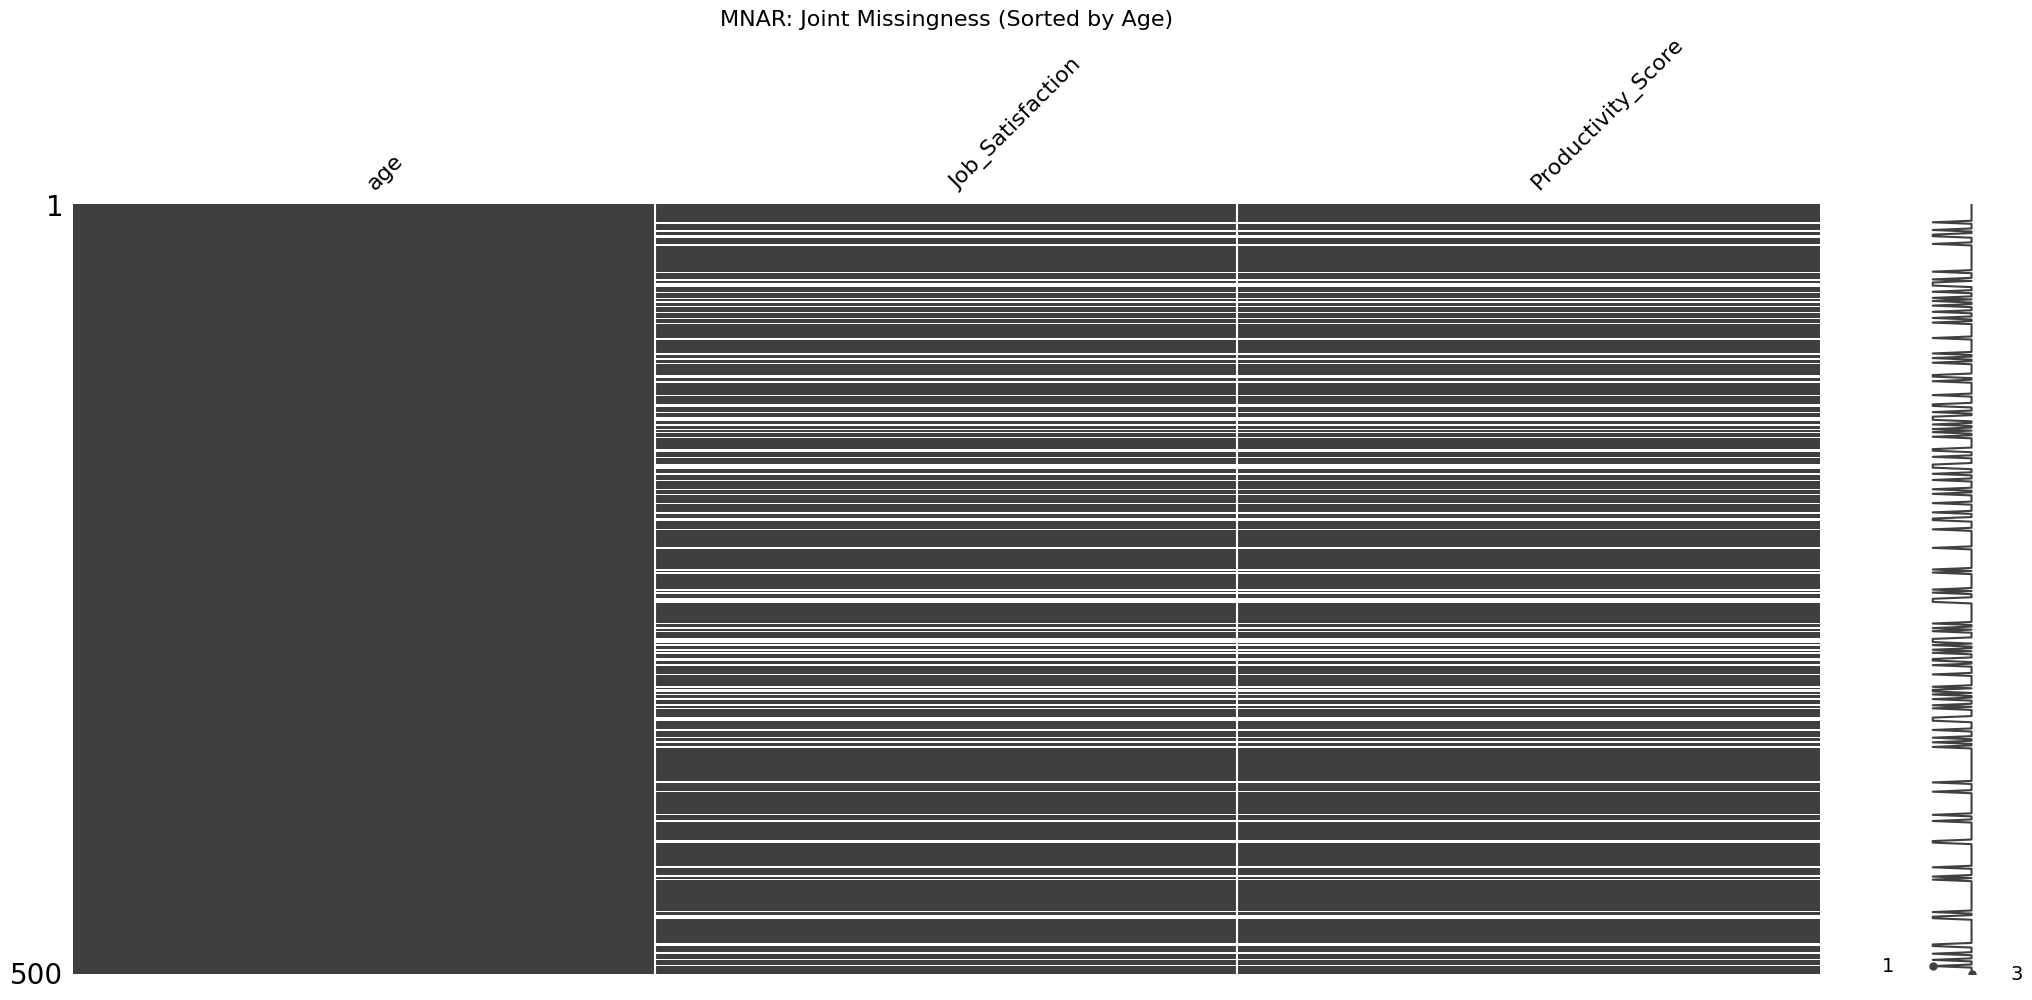

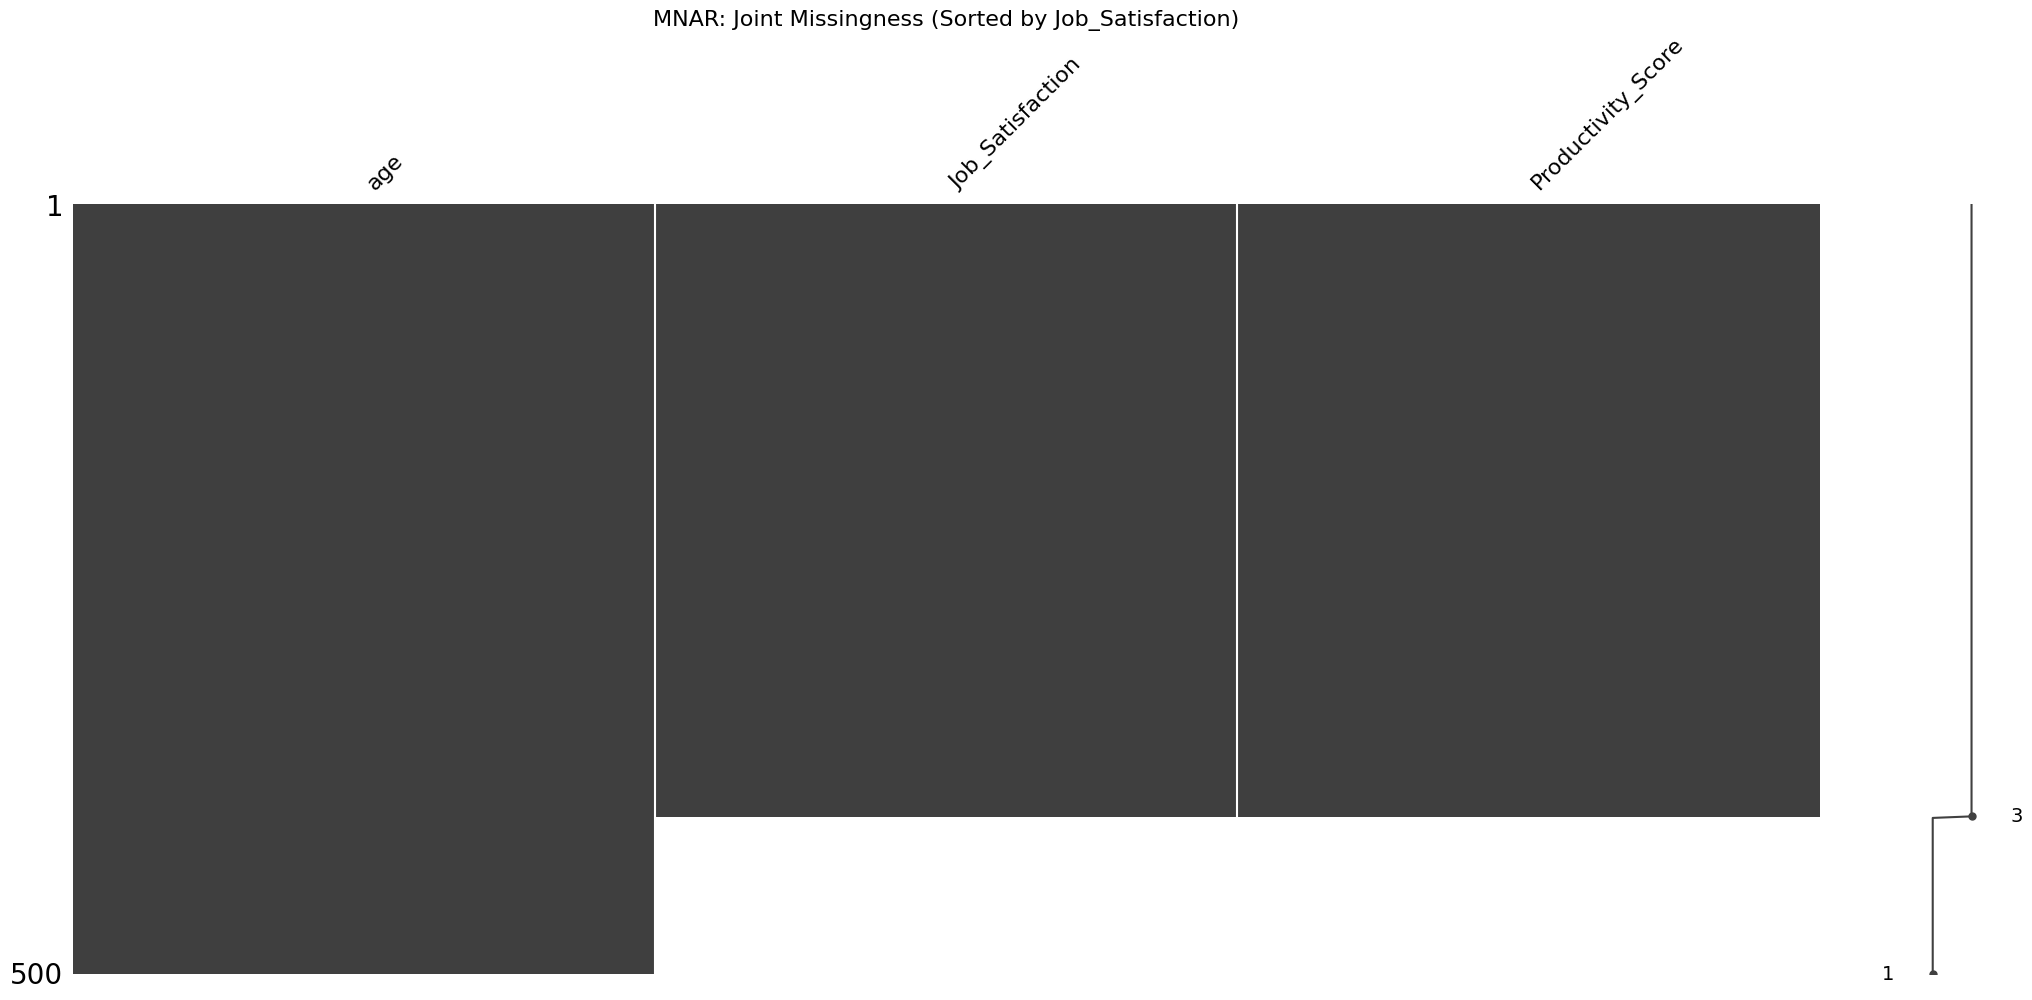

In [4]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

# 1. Create the base data
np.random.seed(15) # for reproducible results
data_size = 500
data = {
    'age': np.random.randint(20, 65, size=data_size),
    'job_satisfaction_true': np.random.randint(1, 11, size=data_size), # This is the TRUE, underlying satisfaction
    'productivity_score_true': np.random.uniform(0.5, 1.5, size=data_size) # This is TRUE productivity
}
df = pd.DataFrame(data)

# We will create the *observed* columns, which will have missing values
df['Job_Satisfaction'] = df['job_satisfaction_true']
df['Productivity_Score'] = df['productivity_score_true']

# 2. Introduce MNAR:
# People with very low actual job satisfaction are less likely to report BOTH their satisfaction and productivity.
for i in df.index:
    # If TRUE job satisfaction is low (e.g., 1 or 2), there's a high chance (70%) both observed columns are missing
    if df.loc[i, 'job_satisfaction_true'] <= 2:
        if np.random.rand() < 0.7:
            df.loc[i, 'Job_Satisfaction'] = np.nan
            df.loc[i, 'Productivity_Score'] = np.nan
    # If TRUE job satisfaction is moderate (e.g., 3 or 4), a smaller chance (30%)
    elif df.loc[i, 'job_satisfaction_true'] <= 4:
        if np.random.rand() < 0.3:
            df.loc[i, 'Job_Satisfaction'] = np.nan
            df.loc[i, 'Productivity_Score'] = np.nan
            
# Drop the "true" columns before visualization, as they are unobservable in the real data
df_observed = df.drop(columns=['job_satisfaction_true', 'productivity_score_true'])

# 3. Visualize with missingno
# To show MNAR, you typically need to sort by the *original* variable that causes missingness.
# Since 'job_satisfaction_true' is gone, we sort by 'Job_Satisfaction' to try and reveal the underlying pattern.
# This will group the *non-missing* low satisfaction values, but the missingness itself will often look random
# against other *observed* variables. The key is it's NOT explained by any *other* observed variable.

# Let's try sorting by 'age' to demonstrate that other observed variables don't explain the missingness
msno.matrix(df_observed.sort_values('age'))
plt.title('MNAR: Joint Missingness (Sorted by Age)', fontsize=16)
plt.show()

# And then by one of the affected columns to see if it reveals a pattern for itself
msno.matrix(df_observed.sort_values('Job_Satisfaction'))
plt.title('MNAR: Joint Missingness (Sorted by Job_Satisfaction)', fontsize=16)
plt.show()

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [7]:
df['test_total'] = df.iloc[:,55:75].sum(axis=1)

In [11]:
df[df['test_total'] != df['PCIAT-PCIAT_Total']]['test_total'].unique()

array([0.])